<a href="https://colab.research.google.com/github/SavchukDI/3d_ml_mai/blob/main/3dml_lab_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@ Credit to [Meher Shashwat Nigam](https://www.linkedin.com/in/mehershashwatnigam/) ( Github: [ShashwatNigam99](https://github.com/ShashwatNigam99), Email: meher.shashwat@students.iiit.ac.in) 

and [Alberto Tono](https://www.linkedin.com/in/albertotono3/) (Email: alberto.tono@cd.institute)

# Requirements and Setup
It will take a while to install all the dependencies and expect around 20min to run this demo on this Google Colab

In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
%env FORCE_CUDA=1
!pip install -U torch==1.6 torchvision==0.7 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install pyyaml==5.1 pycocotools>=2.0.1
!pip install -U fvcore==0.1.3.post20210317
!pip install -U --force-reinstall iopath==0.1.6 
!pip install 'git+https://github.com/facebookresearch/detectron2.git@4b539e41f4b19570bc6b722fa0f516f927cdae02'
!pip install 'git+https://github.com/facebookresearch/pytorch3d.git'

env: FORCE_CUDA=1
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 708.0 MB 10 kB/s 
     |████████████████████████████████| 5.9 MB 46.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.6.0+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.6.0+cu101 which is incompatible.
     |████████████████████████████████| 47 kB 3.4 MB/s 
 

## Imports and checking installation parameters(python 3.6.9, cuda 10.1)

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available(),torch.cuda.device_count())
!gcc --version
!python --version
!nvcc --version
!nvidia-smi
!python -m detectron2.utils.collect_env

1.6.0+cu101 True 1
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Python 3.7.12
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Fri Dec 24 22:17:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|=========

## Installing meshrcnn
It will create a folder structure on your left in which you can navigate


In [3]:
!git clone https://github.com/facebookresearch/meshrcnn.git
!cd meshrcnn && pip install -e .

Cloning into 'meshrcnn'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 256 (delta 16), reused 31 (delta 13), pack-reused 210
Receiving objects: 100% (256/256), 136.48 KiB | 9.10 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Obtaining file:///content/meshrcnn
  Running setup.py develop for meshrcnn


# Loading Pix3D Dataset
Also this import will take a while since it is loading the entire dataset 3.5GB


In [4]:
# pix3d data
!./meshrcnn/datasets/pix3d/download_pix3d.sh

--2021-12-24 22:18:14--  http://pix3d.csail.mit.edu/data/pix3d.zip
Resolving pix3d.csail.mit.edu (pix3d.csail.mit.edu)... 128.52.128.175
Connecting to pix3d.csail.mit.edu (pix3d.csail.mit.edu)|128.52.128.175|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3783261880 (3.5G) [application/zip]
Saving to: ‘pix3d.zip’

pix3d.zip           100%[===================>]   3.52G  33.2MB/s    in 1m 50s  

2021-12-24 22:20:05 (32.7 MB/s) - ‘pix3d.zip’ saved [3783261880/3783261880]

--2021-12-24 22:21:27--  https://dl.fbaipublicfiles.com/meshrcnn/pix3d/pix3d_s1_train.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4781155 (4.6M) [text/plain]
Saving to: ‘pix3d_s1_train.json’

pix3d_s1_train.json 100%[===================>]   4.56M  3.50MB/s    in 1.3s    

2021-12-24

In [6]:
from google.colab import files
uploaded = files.upload()  # import a sofa from your computer and name it test.jpg

Saving test.jpg to test (1).jpg


## Demo (Inference)

In [7]:
# Running Demo on random image of the pix3d dataset, change according to your need (change 'test.jpg' to your file name)
# Be sure to upload the file on the correct folder

!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/test.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

[12/24 22:24:18 demo]: Arguments: Namespace(config_file='./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml', focal_length=20.0, input='/content/test.jpg', onlyhighest=True, opts=['MODEL.WEIGHTS', 'meshrcnn://meshrcnn_R50.pth'], output='output_demo')
meshrcnn_R50.pth: 487MB [00:43, 11.1MB/s]               
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  filter_inds = filter_mask.nonzero()
[12/24 22:25:09 demo]: Predictions saved in output_demo/test


# Visualize the Picture Uploaded and the Segmentation Mask 

In [10]:
filename = 'test.jpg' #check the name is the same as the file you uploaded
maskname = '0_mask_sofa_1.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

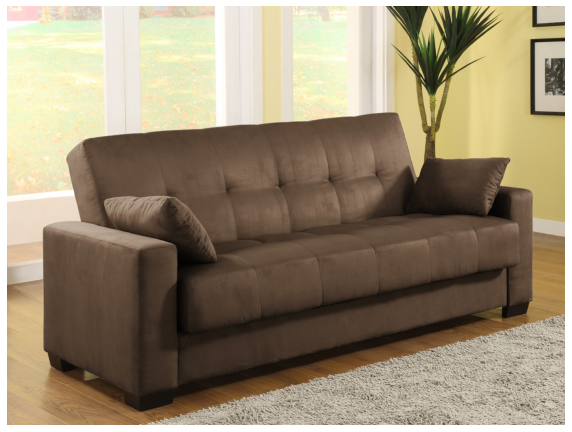

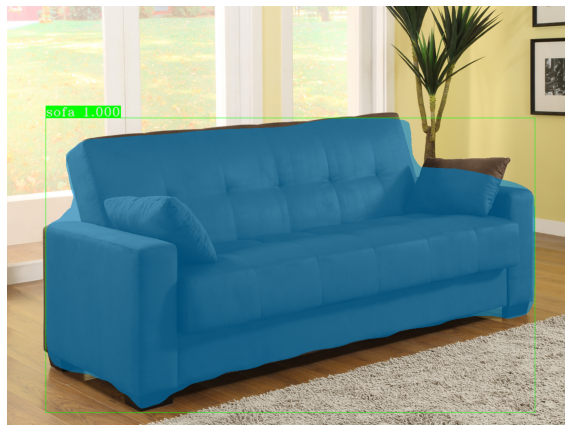

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/output_demo/test/" + maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

# Download the .obj file

In [12]:
name = 'sofa' # change file name accordingly

In [13]:
from google.colab import files
files.download('/content/output_demo/test/0_mesh_'+ name + '_1.000.obj')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
!pip install mesh_to_sdf pyrender trimesh

     |████████████████████████████████| 1.2 MB 12.1 MB/s 
     |████████████████████████████████| 639 kB 49.5 MB/s 
     |████████████████████████████████| 2.2 MB 43.6 MB/s 
     |████████████████████████████████| 890 kB 41.8 MB/s 
  Created wheel for pyopengl: filename=PyOpenGL-3.1.0-py3-none-any.whl size=1745210 sha256=4fcaf2ca0c719e1f38cc654cda52db5d3865b1ce9abb4691112b9c048d3f7126
  Stored in directory: /root/.cache/pip/wheels/c6/83/cb/af51a0c06c33d08537b941bbfc87469e8a3c68d05f77a6a212
Successfully built pyopengl
  Attempting uninstall: pyopengl
    Found existing installation: PyOpenGL 3.1.5
    Uninstalling PyOpenGL-3.1.5:
      Successfully uninstalled PyOpenGL-3.1.5


In [26]:
import trimesh

from pytorch3d.io import load_obj
from pytorch3d.renderer import TexturesUV, TexturesVertex, TexturesAtlas
from pytorch3d.renderer import (
    look_at_view_transform,
    OpenGLPerspectiveCameras,
    DirectionalLights, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    HardPhongShader
)

In [23]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  torch.cuda.set_device(device)
else:
  device = torch.device('cpu')

In [24]:
path_to_model = '/content/output_demo/test/0_mesh_'+ name + '_1.000.obj'

# Trimesh .obj model
Sofa_trimesh = trimesh.load(path_to_model)

if isinstance(Sofa_trimesh, trimesh.Scene):
    Chair_trimesh = Sofa_trimesh.dump(concatenate=True)

Sofa_trimesh.vertices -= Sofa_trimesh.center_mass
scaling = 2 / Sofa_trimesh.scale
Sofa_trimesh.apply_scale(scaling=scaling)

# Rainbow sofa in trimesh
# for facet in Sofa_trimesh.facets:
#   Sofa_trimesh.visual.face_colors[facet] = trimesh.visual.random_color() 

# Sofa mesh in pytorch3d
verts, faces_idx, _ = load_obj(path_to_model)
faces = faces_idx.verts_idx

center = verts.mean(0)
verts = verts - center
scale = max(verts.abs().max(0)[0])
verts = verts / scale

# Initialize each vertex to be white in color.
verts_rgb = torch.ones_like(verts)[None]  # (1, V, 3)

# Rainbow chair in pytorch3d
# verts_rgb = torch.rand_like(verts)[None]

textures = TexturesVertex(verts_features=verts_rgb.to(device))

# Create a Meshes object for the sofa.
Sofa_mesh = Meshes(
    verts=[verts.to(device)],   
    faces=[faces.to(device)], 
    textures=textures
)

In [28]:
# Initialize an OpenGL perspective camera.
cameras = OpenGLPerspectiveCameras(device=device)

# We will also create a phong renderer. This is simpler and only needs to render one face per pixel.
raster_settings = RasterizationSettings(
    image_size=1024, 
    blur_radius=0, 
    faces_per_pixel=1, 
)

# We can add a point light in front of the object. 
#lights = PointLights(device=device, location=((2.0, 2.0, -2.0),))
ambient_color = torch.FloatTensor([[0.0, 0.0, 0.0]]).to(device)
diffuse_color = torch.FloatTensor([[1.0, 1.0, 1.0]]).to(device)
specular_color = torch.FloatTensor([[0.1, 0.1, 0.1]]).to(device)
direction = torch.FloatTensor([[1, 1, 1]]).to(device)
lights = DirectionalLights(ambient_color=ambient_color,
                           diffuse_color=diffuse_color,
                           specular_color=specular_color,
                           direction=direction,
                           device=device)

phong_renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=HardPhongShader(
        device=device, 
        cameras=cameras, 
        lights=lights
        )
)

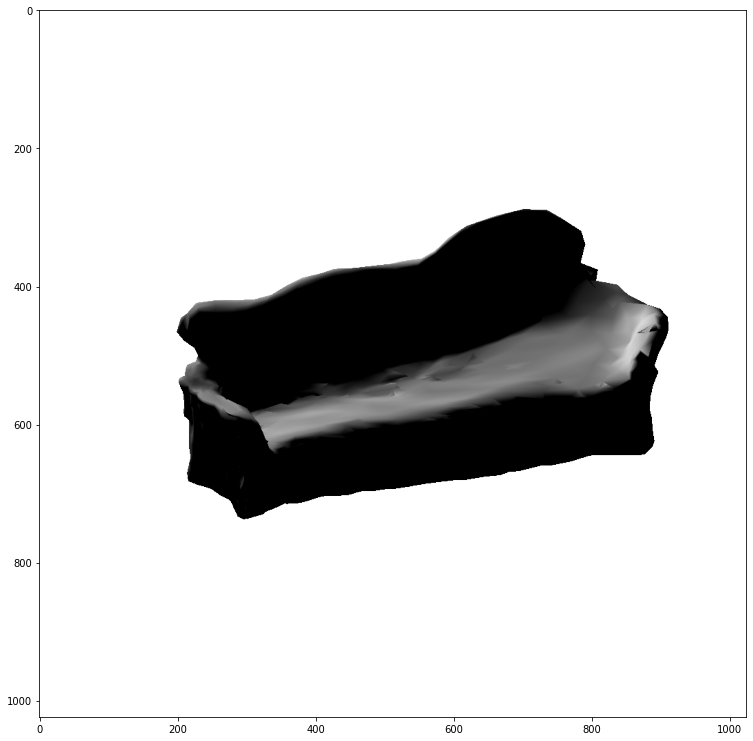

In [56]:
# Select the viewpoint using spherical angles  
distance = 2.0   # distance from camera to the object`
elevation = 10.0   # angle of elevation in degrees
azimuth = 190.0  # No rotation so the camera is positioned on the +Z axis. 

# Get the position of the camera based on the spherical angles
R, T = look_at_view_transform(distance, elevation, azimuth, device=device,at=((-0.02,0.1,0.0),))

# Render the sofa providing the values of R and T. 
image_Sofa = phong_renderer(meshes_world=Sofa_mesh, R=R, T=T)

image_Sofa = image_Sofa.cpu().numpy()

plt.figure(figsize=(13, 13))
plt.imshow(image_Sofa.squeeze())
plt.grid(False)